<a href="https://colab.research.google.com/github/AKMADOU/projet-1/blob/main/ADOU_Kouam%C3%A9_MathurinLogRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [2]:
##### WRITE YOUR CODE HERE #####
path= '/content/diabetes.csv'
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [3]:
##### WRITE YOUR CODE HERE #####
data.head(5)
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [4]:
##### WRITE YOUR CODE HERE #####
data.info()
#### END CODE ####

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Question 3: Describe your dataset

In [5]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [6]:
##### WRITE YOUR CODE HERE #####
def Scale(data):
  Mean=np.mean(data,axis=0)
  Std=np.std(data,axis=0)
  return (data-Mean)/Std
#### END CODE ####

Question 5: Scale your features, except the target. 

In [7]:
##### WRITE YOUR CODE HERE #####
data.iloc[:,:-1]=Scale(data.iloc[:,:-1]) 
data
#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [8]:
##### WRITE YOUR CODE HERE #####
def train_test_split(data,num_percent):
  np.random.seed(1)
  m=len(data)
  perm=np.random.permutation(data.index)
  Indices=int(num_percent*m)
  train=data.iloc[perm[:Indices]]
  test=data.iloc[perm[Indices:]]
  x_train=train.iloc[:,:-1]
  y_train=train.iloc[:,-1]
  x_test=test.iloc[:,:-1]
  y_test=test.iloc[:,-1]
  return x_train.values,y_train.values,x_test.values,y_test.values
#### END CODE ####

In [9]:
x_train,y_train,x_test,y_test=train_test_split(data,0.8)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(614, 8) (614,) (154, 8) (154,)


# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [12]:
class logistic_regression:
  def __init__(self,x_test,y_test, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters=num_iters
    self.threshold=threshold
    self.tolerance=tolerance
    self.lr=lr
    self.theta=None
    self.cost_history=[]
    self.cost_history_test=[]
    self.x_test=x_test
    self.y_test=y_test
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new= np.hstack([np.ones((x.shape[0],1)),x])
    return x_new
    #### END CODE ####

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    # x=self.add_ones(x)
    # theta=np.zeros(x.shape[1])
    z= x@theta
    y_pred= 1/(1+np.exp(-z))
    return y_pred
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = x.shape[0] # Length of x
    # x_new=self.add_ones(x)
    y_pred = self.sigmoid(x,self.theta)
    Cost = -np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
        
    return Cost/n
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1,1) # reshape y. This is optional, do it if needed
    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x,self.theta) # using sigmoid function 

      # Gradient of cross-entropy
      grad= -x.T@(y.reshape(-1,1)-y_pred.reshape(-1,1))
      grad= grad.reshape(-1,1) # Reshape, if it is needed

      # update rules
      self.theta= self.theta-(self.lr*grad)
      # Compute the training loss
      self.cost_history.append(self.cross_entropy(x,y.reshape(-1,1)))
      self.cost_history_test.append(self.cross_entropy(self.add_ones(x_test),y_test.reshape(-1,1)))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y.reshape(-1,1))}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x,self.theta) # Predict proba with sigmoid
    return y_pred_prob
  def predict(self, x):
    # x=self.add_ones(x)
    proba= self.predict_proba(x) # Get probability of x
    result= [1 if proba > self.threshold else 0  for proba in proba]  # Convert proba to 0 or 1. hint: list comprehension
    return  result
  
    
  
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_history)),self.cost_history,'r',linewidth='2',label='Train_loss')
    plt.plot(np.arange(len(self.cost_history_test)),self.cost_history_test,'b',linewidth='2',label='validation_loss')
    plt.legend()
    plt.show()
    #### END CODE ####

In [13]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(x_test,y_test,num_iters=10000)

In [14]:
%%time
model.fit(x_train, y_train)

cost for 100 iteration : 0.6300736350121298
cost for 200 iteration : 0.590476592620127
cost for 300 iteration : 0.5640295505392855
cost for 400 iteration : 0.5453674667810404
cost for 500 iteration : 0.5316075447013153
cost for 600 iteration : 0.5211086882440066
cost for 700 iteration : 0.512881210376232
cost for 800 iteration : 0.5062966833571747
cost for 900 iteration : 0.5009378563627476
cost for 1000 iteration : 0.49651690122583736
cost for 1100 iteration : 0.4928286965225258
cost for 1200 iteration : 0.48972295719583886
cost for 1300 iteration : 0.48708695197375973
cost for 1400 iteration : 0.4848344081982395
cost for 1500 iteration : 0.48289816360184556
cost for 1600 iteration : 0.48122516168195456
cost for 1700 iteration : 0.4797729567281936
cost for 1800 iteration : 0.4785072178097646
cost for 1900 iteration : 0.4773999102191097
cost for 2000 iteration : 0.4764279467391001
cost for 2100 iteration : 0.4755721714353812
cost for 2200 iteration : 0.47481658317777314
cost for 2300 i

In [15]:
pred= model.predict(x_test)

In [16]:
# Predict Proba
model.predict_proba(x_test)

array([[0.7373873 ],
       [0.17368319],
       [0.04583055],
       [0.13707056],
       [0.13230685],
       [0.6499096 ],
       [0.48531889],
       [0.52517722],
       [0.73669073],
       [0.04656634],
       [0.65009502],
       [0.04235583],
       [0.05699694],
       [0.1128538 ],
       [0.43179308],
       [0.25969756],
       [0.29574927],
       [0.39220418],
       [0.16702759],
       [0.36795153],
       [0.16813779],
       [0.18408077],
       [0.12935173],
       [0.89324561],
       [0.3042817 ],
       [0.64007069],
       [0.77199163],
       [0.67250698],
       [0.0928238 ],
       [0.15330978],
       [0.6344555 ],
       [0.73871125],
       [0.11740601],
       [0.90114955],
       [0.16400436],
       [0.85020846],
       [0.96234078],
       [0.17777603],
       [0.11167833],
       [0.15875338],
       [0.81883102],
       [0.20519168],
       [0.26294529],
       [0.47242628],
       [0.08592288],
       [0.04822078],
       [0.19695831],
       [0.201

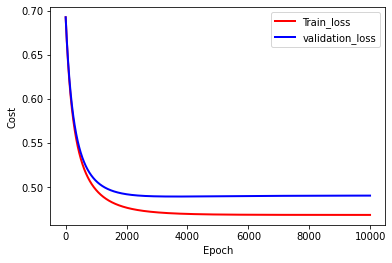

In [17]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [16]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [17]:
! git clone https://github.com/{username}/{my_repository}.git

Cloning into 'github.com'...
fatal: could not read Username for 'https://github.com': No such device or address


In [18]:
! git remote -v

fatal: not a git repository (or any of the parent directories): .git


Copy data to test-live-coding folder

In [19]:
!cp diabetes.csv /content/test-live-coding

In [20]:
%cd /content/test-live-coding

[Errno 20] Not a directory: '/content/test-live-coding'
/content


In [21]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [22]:
!git config user.email useremail
!git config user.name username

fatal: not in a git directory
fatal: not in a git directory


In [23]:
!git add .
!git commit -m "Add my files"

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [24]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [25]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


# If you cannot push, use:

In [26]:
!git remote rm origin

fatal: not a git repository (or any of the parent directories): .git


In [27]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [28]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [70]:
class logistic_regression_l1_l2_l12:
  def __init__(self,x_test,y_test,batch_size,lambda1,lambda2, num_iters= 1000, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters=num_iters
    self.threshold=threshold
    self.tolerance=tolerance
    self.batch_size=batch_size
    self.lambda1=lambda1
    self.lambda2=lambda2
    self.lr=lr
    self.theta=None
    self.cost_history=[]
    self.cost_history_test=[]
    self.x_test=x_test
    self.y_test=y_test
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new= np.hstack([np.ones((x.shape[0],1)),x])
    return x_new
    #### END CODE ####

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    # x=self.add_ones(x)
    # theta=np.zeros(x.shape[1])
    z= x@theta
    y_pred= 1/(1+np.exp(-z))
    return y_pred
    #### END CODE ####
    #### END CODE ####
  def Function(self,w):
    val=[]
    for i in w:
      if i<0:
        val.append(-1)
      else:
        val.append(1)
    return np.array(val).reshape(-1,1)
  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = x.shape[0] # Length of x
    # x_new=self.add_ones(x)
    y_pred = self.sigmoid(x,self.theta)
    Cost = - np.sum(y_true * np.log(y_pred) + (1 - y_true)* np.log(1 - y_pred))/n 
        
    return Cost
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1,1) # reshape y. This is optional, do it if needed
    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    m = len(y)
    loss_ = []
    # cost_history= np.zeros(self.epoch)
    cost_history_ = []
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta
      # Gradient of cross-entropy
      index = np.random.permutation(m)
      xind = x[index]
      yind = y[index]
      for j in range(0,m,self.batch_size):
        x_ = xind[j:j+self.batch_size]
        y_ = yind[j:j+self.batch_size].reshape(-1,1)

        # make predictions
        y_pred= self.sigmoid(x_,self.theta) # using sigmoid function 
        grad= - x_.T @ (y_ - y_pred)+2*self.lambda2*self.theta +self.lambda1*self.Function(self.theta)
        grad= grad.reshape(-1,1) # Reshape, if it is needed
        
        self.theta= self.theta- self.lr* grad
        loss_.append(self.cross_entropy(x_,y_))
      # Compute the training loss
      self.cost_history.append(np.mean(loss_))
      self.cost_history_test.append(self.cross_entropy(self.add_ones(x_test),y_test.reshape(-1,1)))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x_, y_)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x,self.theta) # Predict proba with sigmoid
    return y_pred_prob
  def predict(self, x):
    # x=self.add_ones(x)
    proba= self.predict_proba(x) # Get probability of x
    result= [1 if proba > self.threshold else 0  for proba in proba]  # Convert proba to 0 or 1. hint: list comprehension
    return  result
  
    
  
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_history)),self.cost_history,'r',linewidth='2',label='Train_loss')
    plt.plot(np.arange(len(self.cost_history_test)),self.cost_history_test,'b',linewidth='2',label='validation_loss')
    plt.legend()
    plt.show()
    #### END CODE ####

In [86]:
# Create a model by instanciating the class logistic_regression_l1
model1 = logistic_regression_l1_l2_l12(x_test,y_test,batch_size=60,lambda1=0.5,lambda2=0, num_iters= 1000, threshold= 0.5, tolerance= 1e-15, lr= 0.0001)

In [87]:
%%time
model1.fit(x_train, y_train)

cost for 100 iteration : 0.3809264613826215
cost for 200 iteration : 0.5622982682682381
cost for 300 iteration : 0.4427043222519544
cost for 400 iteration : 0.3902473802491886
cost for 500 iteration : 0.39934206777479125
cost for 600 iteration : 0.64948423972661
cost for 700 iteration : 0.3091111627991087
cost for 800 iteration : 0.305886056083978
cost for 900 iteration : 0.5080027402471282
CPU times: user 1.56 s, sys: 20.6 ms, total: 1.58 s
Wall time: 1.56 s


In [88]:
pred1= model1.predict(x_test)

In [89]:
# Predict Proba
model1.predict_proba(x_test)

array([[0.69368948],
       [0.18806261],
       [0.05352728],
       [0.15655864],
       [0.15762676],
       [0.65492132],
       [0.45965579],
       [0.53787301],
       [0.71848387],
       [0.06092673],
       [0.63869457],
       [0.06475224],
       [0.08684367],
       [0.14690063],
       [0.4582123 ],
       [0.26824089],
       [0.29275055],
       [0.43158462],
       [0.19673162],
       [0.36982453],
       [0.19023697],
       [0.20745523],
       [0.149678  ],
       [0.85919751],
       [0.30937796],
       [0.62218575],
       [0.74326768],
       [0.55069487],
       [0.12129802],
       [0.17877087],
       [0.63923635],
       [0.71477664],
       [0.1546962 ],
       [0.87212014],
       [0.18732516],
       [0.83233875],
       [0.90570531],
       [0.21356466],
       [0.1300304 ],
       [0.19991091],
       [0.78724749],
       [0.25463896],
       [0.29531291],
       [0.4013968 ],
       [0.10861704],
       [0.06503267],
       [0.22237315],
       [0.241

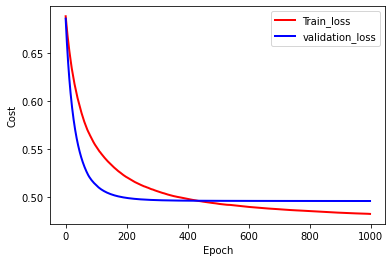

In [90]:
model1.plot()

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?

Answer

1. Why there is no close form for cross-entropy loss?

We know that the derivative of Cross-entropy loss with respective to $\theta$ is:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{pred} \right)
\end{equation}

so $dl(\theta)= 0 ⇒ -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{pred} \right)=0$
.
We know that $x^t \neq 0$, so $y_{true}=y_{pred}⇒ y_{pred}=\dfrac{1}{1+exp(-x{^t}θ)}$


So $y_{pred}(1+exp(-x{^t}θ)=1 ⇒ θ^*=\dfrac{log(\dfrac{y-1}{y})}{x^t} $ exist if only if $y \neq 0$ and 1

There is no close form for the cross-entropy loss because if we assume that the derivative is zero, the estimator $θ$ exists if and only  if only if $y \neq 0$ and 1, this is not true because we have a banary classification problem.

2.Why we need cross-entropy loss instead of mse?

 Cross-entropy is used than MSE for classification, because the decision probability in a classification task is large compared to regression.

3. Why is logistic regression a type of classification technique and not a regression?

Logistic regression uses linear regression to create an odd function that is wrapped with a log function to use the regression as a classifier. Thus, it is a type of classification technique and not a regression.